In [1]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# FOR GOOGLE COLLAB Required Packages 
# !pip install scikit-learn matplotlib seaborn xgboost mlxtend pandas numpy scipy,scikit-optimize,scikit-plot


In [3]:
# FOR GOOGLE COLLAB

# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/DAT490 BitWizards/Data/Original dataset/'
# file1 ='train_transaction.csv'
# file2='train_identity.csv'
# train_df_identity = pd.read_csv(os.path.join(file_path, file1))
# train_df_transaction = pd.read_csv(os.path.join(file_path, file2))

In [4]:
train_df_identity = pd.read_csv('Data/train_identity.csv')
train_df_transaction = pd.read_csv('Data/train_transaction.csv')

In [5]:
train_set = pd.merge(train_df_transaction, train_df_identity, on='TransactionID', how='left')

In [6]:
train_set.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
threshold = 0.4 * len(train_set) # Data that have 60% or more missing values (40% of rows have a value)
train_set_clean = train_set.dropna(thresh=threshold, axis=1)
train_set_clean

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [8]:
train_set_clean.isnull().sum()

TransactionID      0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
V317              12
V318              12
V319              12
V320              12
V321              12
Length: 226, dtype: int64

In [9]:
pd.set_option('display.max_rows',300)
print(train_set_clean.isnull().sum())
print(train_set_clean.dtypes)
pd.reset_option('display.max_rows')

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
P_emaildomain      94456
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D10                76022
D11               279287
D15                89113
M1                271100
M2                271100
M3                271100


In [10]:
train_set_clean['isFraud'].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [11]:
sample_size = int(0.25 * len(train_set_clean)) # I selected 25% of the data. 

fraud_df = train_set_clean[train_set_clean['isFraud'] == 1]
non_fraud_df = train_set_clean[train_set_clean['isFraud'] == 0]

non_fraud_sample_size = sample_size - len(fraud_df) # How many samples we need to fulfill 25%

non_fraud_sample = non_fraud_df.sample(n=non_fraud_sample_size, random_state=42) # Select that amount

final_df = pd.concat([fraud_df, non_fraud_sample]) 


In [12]:
print(final_df['isFraud'].value_counts())
print(len(final_df))

isFraud
0    126972
1     20663
Name: count, dtype: int64
147635


In [13]:
pd.set_option('display.max_rows',300)
print(final_df.isnull().sum())
print(final_df.dtypes)
pd.reset_option('display.max_rows')

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
card2              2370
card3               377
card4               379
card5              1117
card6               377
addr1             20767
addr2             20767
dist1             91083
P_emaildomain     23140
C1                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
C9                    0
C10                   0
C11                   0
C12                   0
C13                   0
C14                   0
D1                  340
D2                72538
D3                67384
D4                42430
D5                76802
D10               20113
D11               73891
D15               23281
M1                71890
M2                71890
M3                71890
M4                66593
M5              

In [14]:
# IMPUTING THE MISSING VALUES USING KNN IMPUTER
from sklearn.impute import KNNImputer

In [15]:
numerical_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = final_df.select_dtypes(include=['object']).columns

In [16]:
file = 'final_df_imputed.csv'
# file_name = os.path.join(file_path, 'final_df_imputed.csv')

if os.path.exists(file): # Change it to file_name if using Collab and comment out file
    final_df = pd.read_csv('final_df_imputed.csv')
else:
    # Apply KNN imputation for numerical features
    imputer = KNNImputer(n_neighbors=5)  
    final_df[numerical_cols] = imputer.fit_transform(final_df[numerical_cols])

    # Apply mode imputation for categorical features
    for col in categorical_cols:
        final_df[col] = final_df[col].fillna(final_df[col].mode()[0])

    # Check if there are any remaining missing values
    print(final_df.isnull().sum().sum())

    final_df.to_csv('final_df_imputed.csv', index=False)

In [17]:
final_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,1.476350e+05,147635.000000,1.476350e+05,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,...,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000
mean,3.283655e+06,0.139960,7.406367e+06,136.707663,9884.982504,362.955565,154.198503,198.525256,291.330878,86.764300,...,43.710765,23.483376,46.737652,29.824809,99.724101,256.011031,160.322535,17.370839,42.125168,27.514737
std,1.694997e+05,0.346947,4.594266e+06,244.472152,4888.105627,157.002325,12.484824,41.722231,96.104141,2.822821,...,234.064335,100.544750,180.499882,125.211010,2023.371160,3782.268019,2580.892475,185.436628,375.057135,256.063217
min,2.987002e+06,0.000000,8.646900e+04,0.272000,1008.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.139613e+06,0.000000,3.167862e+06,41.569000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.283316e+06,0.000000,7.325041e+06,70.000000,9633.000000,361.000000,150.000000,225.200000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.429338e+06,0.000000,1.123153e+07,131.787000,14165.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18395.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55125.000000,4079.939941,6159.890137,4489.850098,92676.000000,134021.000000,97972.000000,29400.000000,29400.000000,29400.000000


In [18]:
# # Separate the DataFrame into two subsets based on the 'isFraud' column
# fraud_0 = final_df[final_df['isFraud'] == 0]
# fraud_1 = final_df[final_df['isFraud'] == 1]

# # Sample 150 rows from each subset
# sampled_fraud_0 = fraud_0.sample(n=150, random_state=42)
# sampled_fraud_1 = fraud_1.sample(n=150, random_state=42)

# # Concatenate the sampled subsets into a single DataFrame
# balanced_df = pd.concat([sampled_fraud_0, sampled_fraud_1])

# # Shuffle the concatenated DataFrame
# final_df = balanced_df.sample(frac=1, random_state=42)

In [19]:
final_df['isFraud'].value_counts()

isFraud
0.0    126972
1.0     20663
Name: count, dtype: int64

In [20]:
X = final_df.drop(['isFraud','TransactionID'], axis=1)
y = final_df['isFraud']

In [21]:
X_numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_categorical_cols = final_df.select_dtypes(include=['object']).columns

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X[X_numerical_cols] = scaler.fit_transform(X[X_numerical_cols])

In [24]:
X = pd.get_dummies(X, columns=X_categorical_cols, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# RQ1 - How can advanced feature engineering and selection techniques, such as Recursive Feature Elimination (RFE), Feature Importance from Gradient Boosting, and Principal Component Analysis (PCA), enhance the accuracy of fraud detection models?


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import learning_curve

In [27]:
def plot_learning_curve(model, X, y, cv):
    # Generate the training set sizes and the training and test scores
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1)

    # Calculate the mean and standard deviation of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("AUC Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [28]:
def evaluate_models(X_train, X_test, y_train, y_test):
    # Define models
    models = {
        'Base Model': DummyClassifier(strategy='stratified', random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=0, criterion="entropy"),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc'),
        "Random Forest": RandomForestClassifier(n_estimators=10, random_state=0),
    }
    
    # Define scoring metrics
    scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
    
    # Initialize cross-validation
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    
    # Initialize results storage
    results = {}

    # Evaluate each model
    for name, model in models.items():
        # Cross-validation results on training set
        cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
        
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Evaluate on the test set
        test_accuracy = model.score(X_test, y_test)
        test_precision = precision_score(y_test, model.predict(X_test))
        test_recall = recall_score(y_test, model.predict(X_test))
        test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        results[name] = {
            'Train Accuracy': np.mean(cv_results['test_accuracy']),
            'Train Precision': np.mean(cv_results['test_precision']),
            'Train Recall': np.mean(cv_results['test_recall']),
            'Train ROC AUC': np.mean(cv_results['test_roc_auc']),
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test ROC AUC': test_roc_auc,
        }
    
    # Convert results to DataFrame for display
    results_df = pd.DataFrame(results).transpose()
    
    return results_df

In [29]:
results_df = evaluate_models(X_train, X_test, y_train, y_test)
print(results_df)

               Train Accuracy  Train Precision  Train Recall  Train ROC AUC  \
Base Model           0.760287         0.142440      0.139671       0.500845   
Decision Tree        0.895663         0.624244      0.651431       0.793571   
XGBoost              0.936321         0.888582      0.626632       0.939045   
Random Forest        0.924764         0.886784      0.534164       0.896621   

               Test Accuracy  Test Precision  Test Recall  Test ROC AUC  
Base Model          0.763640        0.141956     0.145233      0.503281  
Decision Tree       0.898059        0.616958     0.666584      0.800604  
XGBoost             0.937718        0.879639     0.629593      0.939739  
Random Forest       0.928675        0.890650     0.543942      0.898169  


Overall Interpretation:

 - Best Performer: XGBoost, with the highest accuracy and ROC AUC, indicating strong overall performance, especially in distinguishing between classes.
 - Runner-up: Random Forest, with high accuracy and precision but lower recall.
 - Balanced Option: Decision Tree, with good accuracy and a balance between precision and recall.
 - Baseline: The Dummy Classifier, which confirms that all other models provide significant improvements over random guessing.

 I choose the xgboost to continue as our model. We will see which feature selection technique will yield the best result.

 Before I start, I want to check if there are highly correlated features so I can remove them to make computation faster.

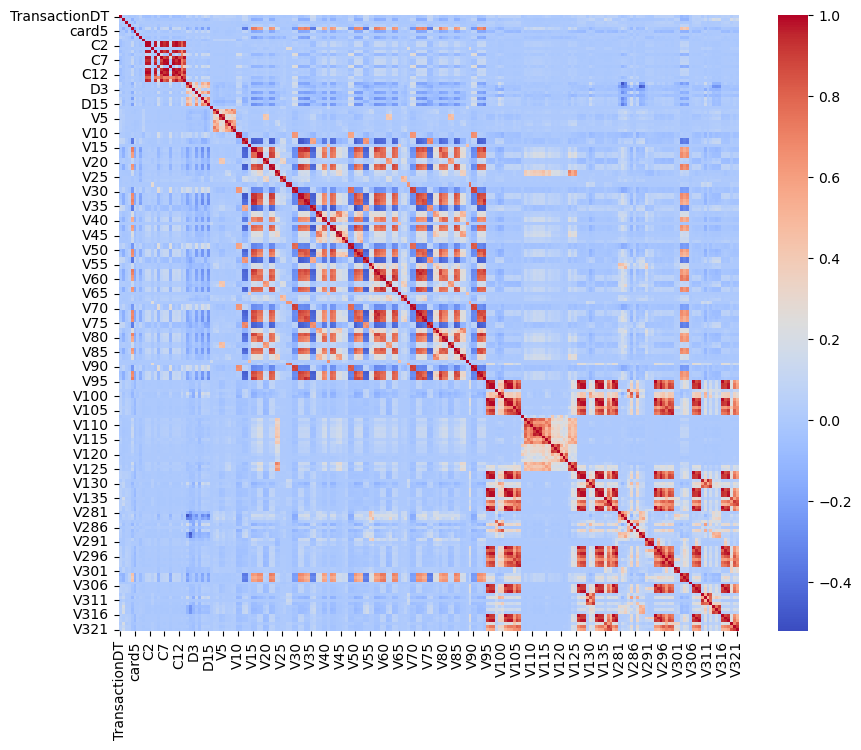

In [30]:
# Calculate the correlation matrix
corr_matrix = X[X_numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [31]:
# Find correlations greater than 0.8 or less than -0.8
highly_correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            # colname_i = corr_matrix.columns[i]
            # colname_j = corr_matrix.columns[j]
            # score = corr_matrix.iloc[i, j]
            # print(f"{colname_i} - {colname_j} : score = {score}")
            colname = corr_matrix.columns[i]
            highly_correlated_features.append(colname)

# Print highly correlated features
unique_cols = []
unique_cols = list(set(highly_correlated_features))
print(unique_cols)
print(len(unique_cols))

['C8', 'V31', 'V50', 'V92', 'V81', 'V111', 'V304', 'V91', 'V122', 'V303', 'V306', 'V285', 'V279', 'V9', 'V83', 'V20', 'V21', 'C2', 'V33', 'V13', 'C9', 'V24', 'V58', 'V133', 'V32', 'V76', 'V74', 'V105', 'V127', 'V40', 'V26', 'V57', 'C10', 'V312', 'V301', 'V36', 'V280', 'V137', 'V28', 'V316', 'V45', 'V59', 'V318', 'V54', 'V289', 'V38', 'V72', 'V309', 'V319', 'V97', 'V113', 'V93', 'V84', 'C4', 'V96', 'V102', 'V100', 'V87', 'V34', 'V112', 'C11', 'V294', 'C6', 'V134', 'C12', 'V63', 'C14', 'V308', 'V80', 'V69', 'V18', 'V64', 'V296', 'V310', 'V52', 'V110', 'V125', 'V5', 'V126', 'V49', 'C13', 'V292', 'V136', 'V30', 'V103', 'V90', 'V128', 'V315', 'V317', 'V73', 'V101', 'V60', 'V311', 'V106', 'V71', 'V67', 'V307', 'V11', 'V299', 'V321', 'V297', 'V119', 'V116', 'V293', 'V70', 'V79', 'V287', 'V42', 'V298', 'V94', 'V62', 'V22', 'V85', 'V51', 'C7', 'V320', 'V16', 'V43', 'V131', 'V295', 'V132']
121


In [32]:
X_droped = X.drop(columns=unique_cols)
print(X_droped.shape)
display(X_droped.head())
display(X_droped.describe())


(147635, 168)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,...,M1_T,M2_T,M3_T,M4_M1,M4_M2,M5_T,M6_T,M7_T,M8_T,M9_T
0,-1.592557,1.261057,1.714989,1.401541,-0.336290,0.658518,-0.419659,0.083498,-0.425657,-0.096608,...,True,True,True,False,False,False,True,False,False,True
1,-1.592463,-0.407449,0.721758,-1.655749,2.467123,-1.474645,-0.182416,0.083498,-0.357360,-0.110028,...,True,True,True,False,True,False,False,False,False,True
2,-1.592451,-0.407449,0.721758,-1.655749,2.467123,-1.474645,0.138071,0.083498,-0.357360,-0.103318,...,True,True,True,False,True,False,False,False,False,True
3,-1.592441,-0.407449,0.721758,-1.655749,2.467123,-1.474645,0.138071,0.083498,-0.357360,-0.096608,...,True,True,True,False,True,False,False,False,False,True
4,-1.592290,0.076955,1.369250,1.159505,2.467123,0.658518,-0.494578,0.083498,-0.426391,-0.103318,...,True,True,True,False,True,False,False,False,False,True


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,...,V284,V286,V288,V290,V291,V300,V302,V305,V313,V314
count,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,...,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05,1.476350e+05
mean,9.647326e-17,1.469418e-18,-8.449532e-17,1.894091e-16,-5.763850e-16,-6.139131e-16,-3.620154e-16,2.584011e-16,2.029211e-17,7.736631e-18,...,-3.029679e-17,4.082486e-17,7.741443e-17,5.785026e-17,2.055682e-17,-4.795989e-17,4.909091e-18,-3.293996e-14,4.179946e-17,-5.874064e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.593274e+00,-5.580845e-01,-1.816044e+00,-1.674857e+00,-4.341165e+00,-2.361465e+00,-1.990877e+00,-2.719427e+01,-4.462195e-01,-1.100281e-01,...,-2.722151e-01,-1.682837e-01,-4.368547e-01,-1.326415e-01,-4.294950e-02,-1.596542e-01,-5.694737e-01,-2.602596e-03,-2.335622e-01,-2.589354e-01
25%,-9.225673e-01,-3.891608e-01,-7.908985e-01,-9.423814e-01,-3.362897e-01,-7.795692e-01,-8.983085e-01,8.349839e-02,-4.205165e-01,-1.033180e-01,...,-2.722151e-01,-1.682837e-01,-4.368547e-01,-1.326415e-01,-4.294950e-02,-1.596542e-01,-5.694737e-01,-2.602596e-03,-2.335622e-01,-2.589354e-01
50%,-1.770158e-02,-2.728650e-01,-5.155031e-02,-1.245568e-02,-3.362897e-01,6.393434e-01,7.980039e-02,8.349839e-02,-3.815947e-01,-1.033180e-01,...,-2.722151e-01,-1.682837e-01,-4.368547e-01,-1.326415e-01,-4.294950e-02,-1.596542e-01,-5.694737e-01,-2.602596e-03,-2.335622e-01,-2.589354e-01
75%,8.325979e-01,-2.012777e-02,8.756014e-01,9.493168e-01,-3.362897e-01,6.585179e-01,4.023682e-01,8.349839e-02,3.216791e-03,-8.989783e-02,...,-2.722151e-01,-1.682837e-01,-4.368547e-01,-1.326415e-01,-4.294950e-02,-1.596542e-01,1.396182e+00,-2.602596e-03,-2.335622e-01,-2.589354e-01
max,1.829409e+00,1.300794e+02,1.740970e+00,1.509820e+00,6.151609e+00,9.221672e-01,2.587505e+00,5.397350e+00,3.732259e+01,3.132668e+01,...,2.528756e+01,3.649880e+01,1.998302e+01,6.419540e+01,5.039605e+01,3.641991e+01,2.891536e+01,3.842317e+02,4.034492e+01,3.386802e+01


In [33]:
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_droped, y,test_size=0.2, random_state=42)

In [34]:
results_df_corr = evaluate_models(X_train_corr, X_test_corr, y_train_corr, y_test_corr)
print(results_df_corr)

               Train Accuracy  Train Precision  Train Recall  Train ROC AUC  \
Base Model           0.760287         0.142440      0.139671       0.500845   
Decision Tree        0.889880         0.603062      0.638362       0.784751   
XGBoost              0.929471         0.877488      0.580524       0.928367   
Random Forest        0.924290         0.903032      0.518310       0.894669   

               Test Accuracy  Test Precision  Test Recall  Test ROC AUC  
Base Model          0.763640        0.141956     0.145233      0.503281  
Decision Tree       0.892404        0.597794     0.645730      0.788550  
XGBoost             0.931080        0.872523     0.579444      0.932224  
Random Forest       0.926576        0.898458     0.520606      0.898078  


In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_validate, StratifiedKFold
import pickle
from sklearn.metrics import roc_curve, auc

In [36]:
def evaluate_model(model, X, y, cv=10):
    # Use StratifiedKFold to ensure each fold has the same proportion of classes
    skf = StratifiedKFold(n_splits=cv)
    cv_results = cross_validate(model, X, y, cv=skf, scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
                                return_train_score=True, return_estimator=True)
    
    results = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
        'CV Mean': [np.mean(cv_results['test_accuracy']), np.mean(cv_results['test_precision']),
                    np.mean(cv_results['test_recall']), np.mean(cv_results['test_roc_auc'])],
        'Train Mean': [np.mean(cv_results['train_accuracy']), np.mean(cv_results['train_precision']),
                       np.mean(cv_results['train_recall']), np.mean(cv_results['train_roc_auc'])]
    })

    results = results.round(3)
    return results, cv_results['estimator'], skf

In [37]:
def plot_roc_curves(estimators, skf, X, y):
    X = np.array(X)
    y = np.array(y)
    
    plt.figure(figsize=(8, 6))
    for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        estimator = estimators[i]
        X_test, y_test = X[test_idx], y[test_idx]
        probs = estimator.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Fold')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [38]:
# Define the pickle file path
pickle_file_path = 'sfs_model.pkl'

# Check if the pickle file exists
if os.path.exists(pickle_file_path):
    # Load the sfs object from the pickle file
    with open(pickle_file_path, 'rb') as f:
        sfs = pickle.load(f)
    print("Loaded SFS from pickle file.")
else:
    # Initialize the XGBoost model
    xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='auc')

    # Initialize SFS with the XGBoost model
    sfs = SFS(estimator=xgb_model,
              k_features='best',
              forward=False,  # Perform RFE
              floating=False,
              scoring='roc_auc',
              n_jobs=-1,
              cv=5)

    # Fit SFS
    sfs = sfs.fit(X_train_corr, y_train_corr)
    
    # Save the sfs object to a pickle file
    with open(pickle_file_path, 'wb') as f:
        pickle.dump(sfs, f)
    print("SFS object created and saved to pickle file.")

Loaded SFS from pickle file.


In [39]:
selected_features_sfs = list(sfs.k_feature_names_)
print(len(selected_features_sfs))
# Create datasets with selected features
X_train_sfs_selected = X_train_corr[selected_features_sfs]
X_test_sfs_selected = X_test_corr[selected_features_sfs]

X_sfs_selected = X_droped[selected_features_sfs]

# Initialize a new XGBoost model for sfs selected feature
xgb_model_sfs_selected = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='auc')

43


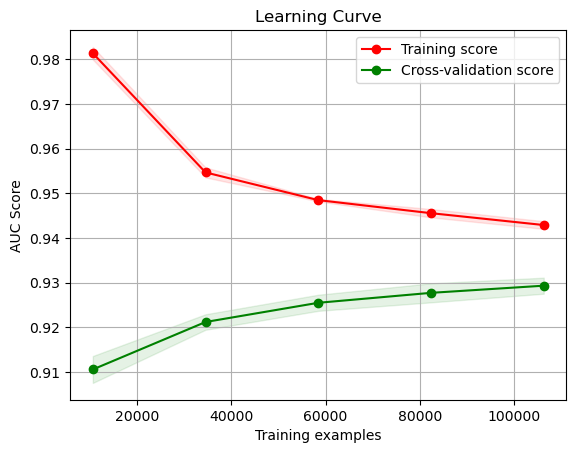

In [40]:
plot_learning_curve(xgb_model_sfs_selected, X_train_sfs_selected, y_train_corr, cv=10)

In [41]:
# Evaluate the model
sfs_results, sfs_estimators, sfs_skf = evaluate_model(xgb_model_sfs_selected, X_sfs_selected, y, cv=10)
print(sfs_results)

      Metric  CV Mean  Train Mean
0   Accuracy    0.863       0.944
1  Precision    0.468       0.923
2     Recall    0.105       0.655
3    ROC AUC    0.481       0.964


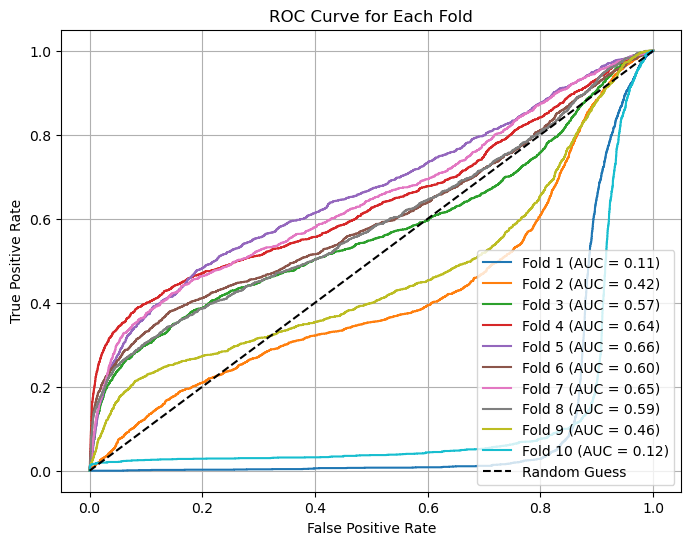

In [42]:
plot_roc_curves(sfs_estimators, sfs_skf, X_sfs_selected, y)

## Feature Importance

In [43]:
# Train an XGBoost model for feature importance
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='auc')
xgb_model.fit(X_train_corr, y_train_corr)

# Get feature importance scores
feature_importances = xgb_model.feature_importances_

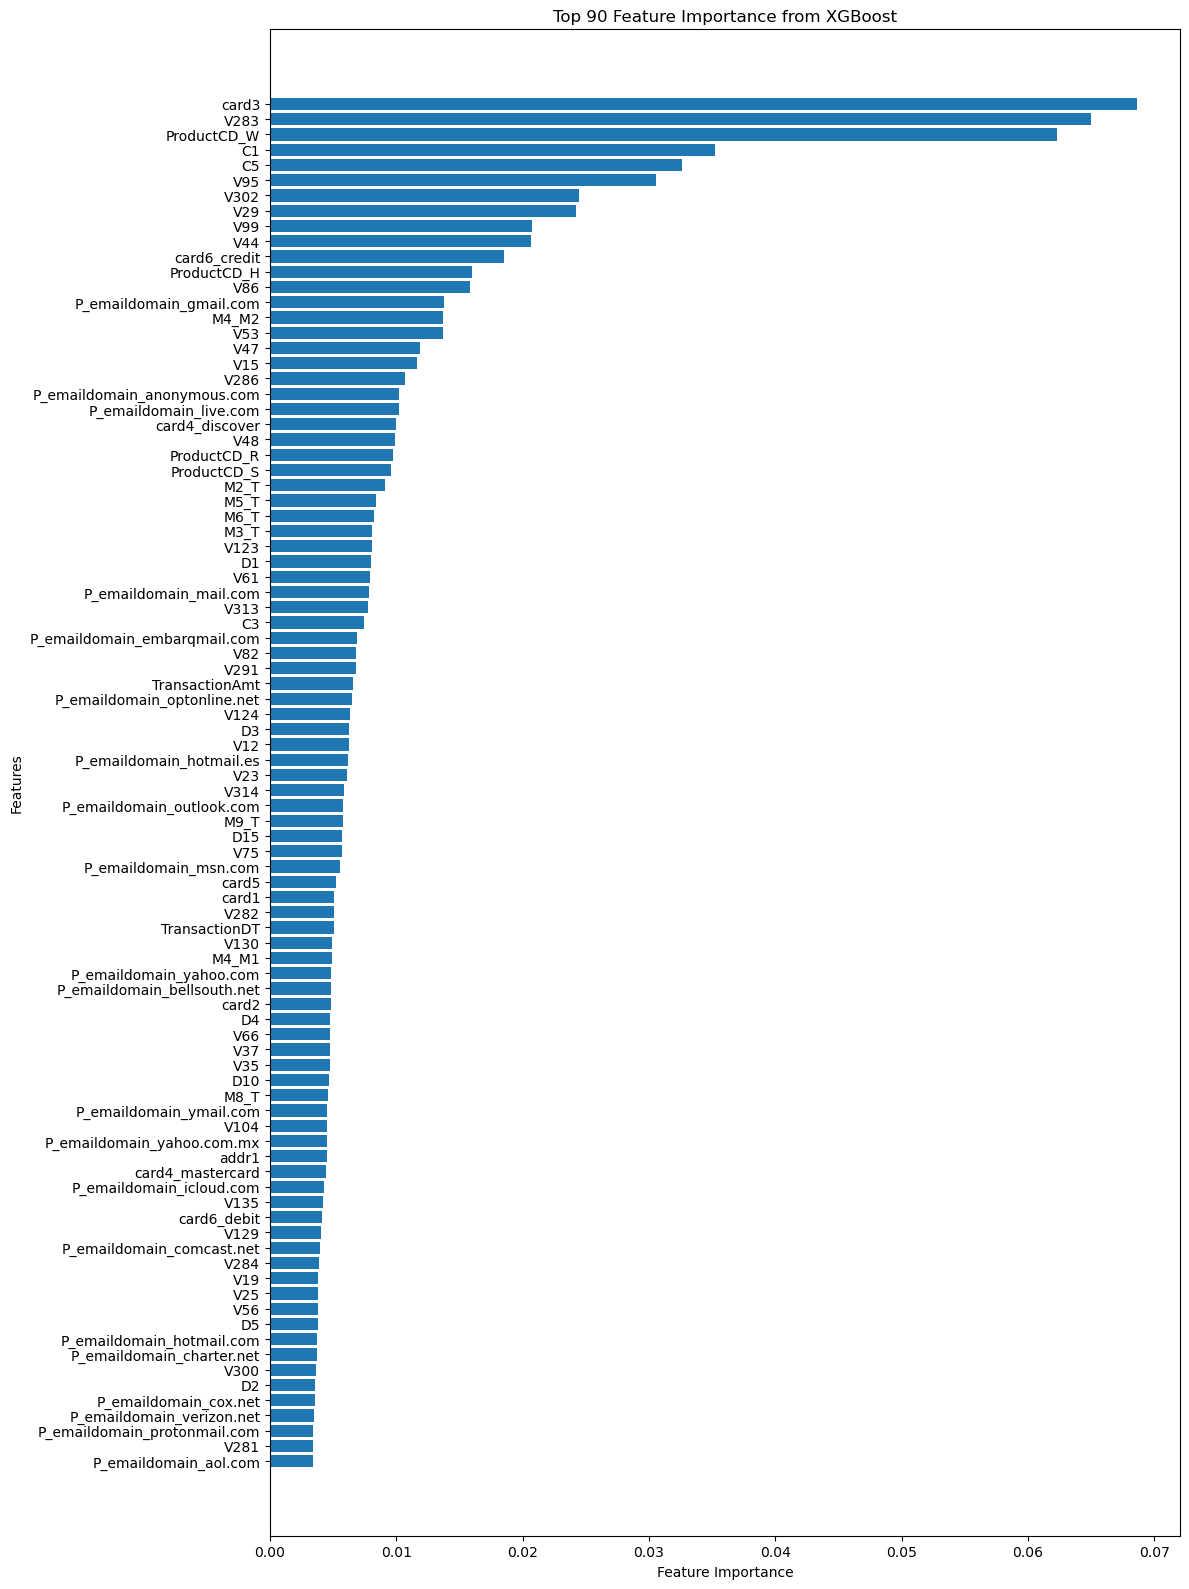

In [44]:
indices = np.argsort(feature_importances)[::-1][:90][::-1] # Get the indices of the top 90 features

plt.figure(figsize=(12, 16))  # Adjust the figure size for better readability
plt.barh(range(90), feature_importances[indices], align='center')
plt.yticks(range(90), X_train_corr.columns[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 90 Feature Importance from XGBoost')
plt.tight_layout()
plt.show()

In [45]:
#  Convert to a DataFrame for easy manipulation
feature_importances_df = pd.DataFrame({
    'Feature': X_train_corr.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
feature_importances_df['Cumulative Importance'] = feature_importances_df['Importance'].cumsum()

# Set a cumulative importance threshold (e.g., 90%)
cumulative_threshold = 0.90
selected_features = feature_importances_df[feature_importances_df['Cumulative Importance'] <= cumulative_threshold]['Feature'].tolist()

# Create datasets with selected features
X_train_selected = X_train_corr[selected_features]
X_test_selected = X_test_corr[selected_features]

X_fi_selected = X_droped[selected_features]

print(f"Selected features names: {selected_features}")
print(f"Number of selected features: {len(selected_features)}")

# Initialize a new XGBoost model for evaluation
xgb_model_selected = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='auc')


Selected features names: ['card3', 'V283', 'ProductCD_W', 'C1', 'C5', 'V95', 'V302', 'V29', 'V99', 'V44', 'card6_credit', 'ProductCD_H', 'V86', 'P_emaildomain_gmail.com', 'M4_M2', 'V53', 'V47', 'V15', 'V286', 'P_emaildomain_anonymous.com', 'P_emaildomain_live.com', 'card4_discover', 'V48', 'ProductCD_R', 'ProductCD_S', 'M2_T', 'M5_T', 'M6_T', 'M3_T', 'V123', 'D1', 'V61', 'P_emaildomain_mail.com', 'V313', 'C3', 'P_emaildomain_embarqmail.com', 'V82', 'V291', 'TransactionAmt', 'P_emaildomain_optonline.net', 'V124', 'D3', 'V12', 'P_emaildomain_hotmail.es', 'V23', 'V314', 'P_emaildomain_outlook.com', 'M9_T', 'D15', 'V75', 'P_emaildomain_msn.com', 'card5', 'card1', 'V282', 'TransactionDT', 'V130', 'M4_M1', 'P_emaildomain_yahoo.com', 'P_emaildomain_bellsouth.net', 'card2', 'D4', 'V66', 'V37', 'V35', 'D10', 'M8_T', 'P_emaildomain_ymail.com', 'V104', 'P_emaildomain_yahoo.com.mx', 'addr1', 'card4_mastercard', 'P_emaildomain_icloud.com', 'V135', 'card6_debit', 'V129', 'P_emaildomain_comcast.net',

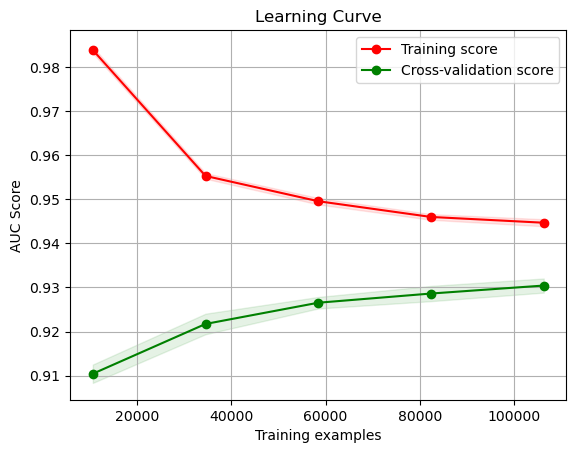

In [46]:
plot_learning_curve(xgb_model_selected, X_train_selected, y_train_corr, cv=10)

In [47]:
fi_results, fi_estimator, fi_skf = evaluate_model(xgb_model_selected, X_fi_selected, y, cv=10)
print(sfs_results)

      Metric  CV Mean  Train Mean
0   Accuracy    0.863       0.944
1  Precision    0.468       0.923
2     Recall    0.105       0.655
3    ROC AUC    0.481       0.964


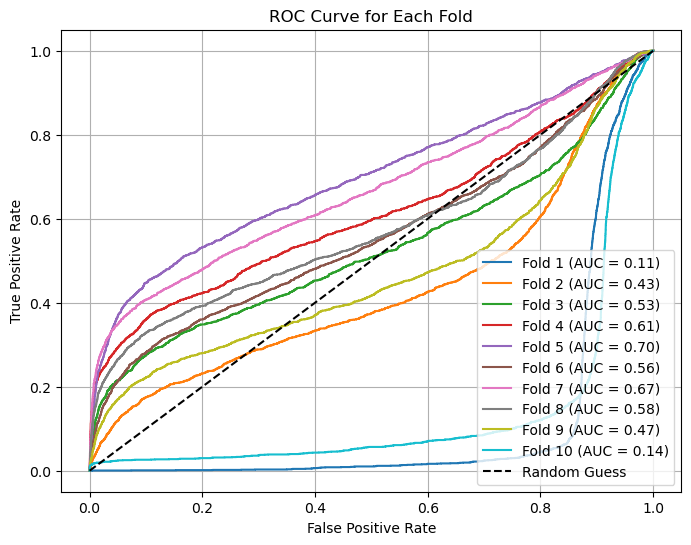

In [48]:
plot_roc_curves(fi_estimator, fi_skf, X_fi_selected, y)

/var/folders/hp/zwgbpb510_z95jmwzhl61pl40000gn/T/ipykernel_12633/466450239.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Count', data=df_counts, palette='viridis')


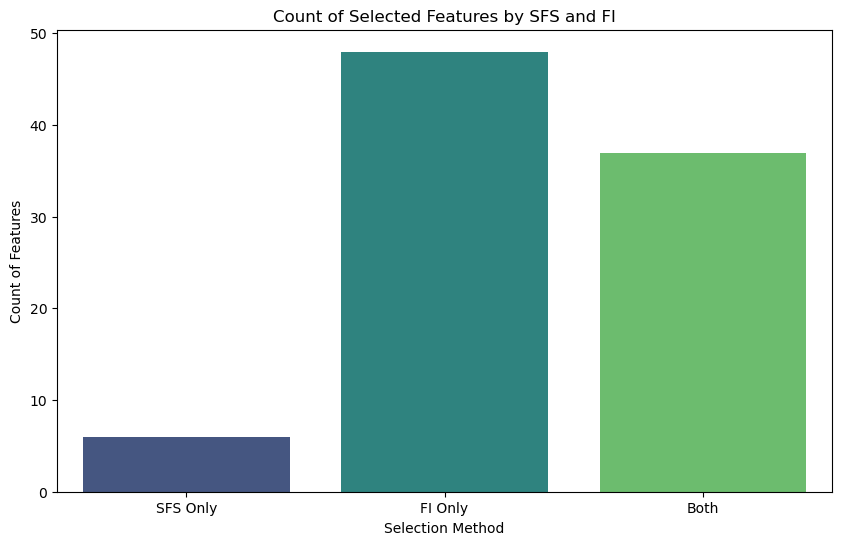

Features selected only by SFS: ['V17', 'V55', 'V10', 'addr2', 'V78', 'card4_visa']
Features selected only by FI: ['card6_debit', 'P_emaildomain_msn.com', 'V44', 'ProductCD_S', 'P_emaildomain_bellsouth.net', 'V123', 'M2_T', 'P_emaildomain_yahoo.com.mx', 'card4_mastercard', 'P_emaildomain_hotmail.es', 'P_emaildomain_comcast.net', 'V19', 'P_emaildomain_optonline.net', 'V86', 'P_emaildomain_live.com', 'V282', 'M4_M2', 'M9_T', 'V284', 'P_emaildomain_icloud.com', 'V95', 'V56', 'V129', 'P_emaildomain_embarqmail.com', 'card4_discover', 'V286', 'P_emaildomain_charter.net', 'V300', 'V37', 'V47', 'V99', 'V15', 'P_emaildomain_outlook.com', 'P_emaildomain_ymail.com', 'V25', 'V130', 'V135', 'V283', 'P_emaildomain_mail.com', 'V48', 'D5', 'P_emaildomain_anonymous.com', 'V104', 'V291', 'V313', 'V12', 'D2', 'D3']
Features selected by both SFS and FI: ['ProductCD_H', 'V302', 'TransactionAmt', 'M8_T', 'C1', 'ProductCD_R', 'C5', 'card1', 'V53', 'M6_T', 'D4', 'M5_T', 'M4_M1', 'V23', 'V314', 'D10', 'D1', 'V8

In [49]:
sfs_set = set(selected_features_sfs)
fi_set = set(selected_features)

# Identify features exclusively selected by each method and overlapping features
sfs_only = sfs_set - fi_set
fi_only = fi_set - sfs_set
both = sfs_set & fi_set

# Create a DataFrame for the counts
df_counts = pd.DataFrame({
    'Method': ['SFS Only', 'FI Only', 'Both'],
    'Count': [len(sfs_only), len(fi_only), len(both)]
})

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Count', data=df_counts, palette='viridis')
plt.title('Count of Selected Features by SFS and FI')
plt.xlabel('Selection Method')
plt.ylabel('Count of Features')
plt.show()

# Print the features for verification
print(f"Features selected only by SFS: {list(sfs_only)}")
print(f"Features selected only by FI: {list(fi_only)}")
print(f"Features selected by both SFS and FI: {list(both)}")

In [50]:
from matplotlib_venn import venn2

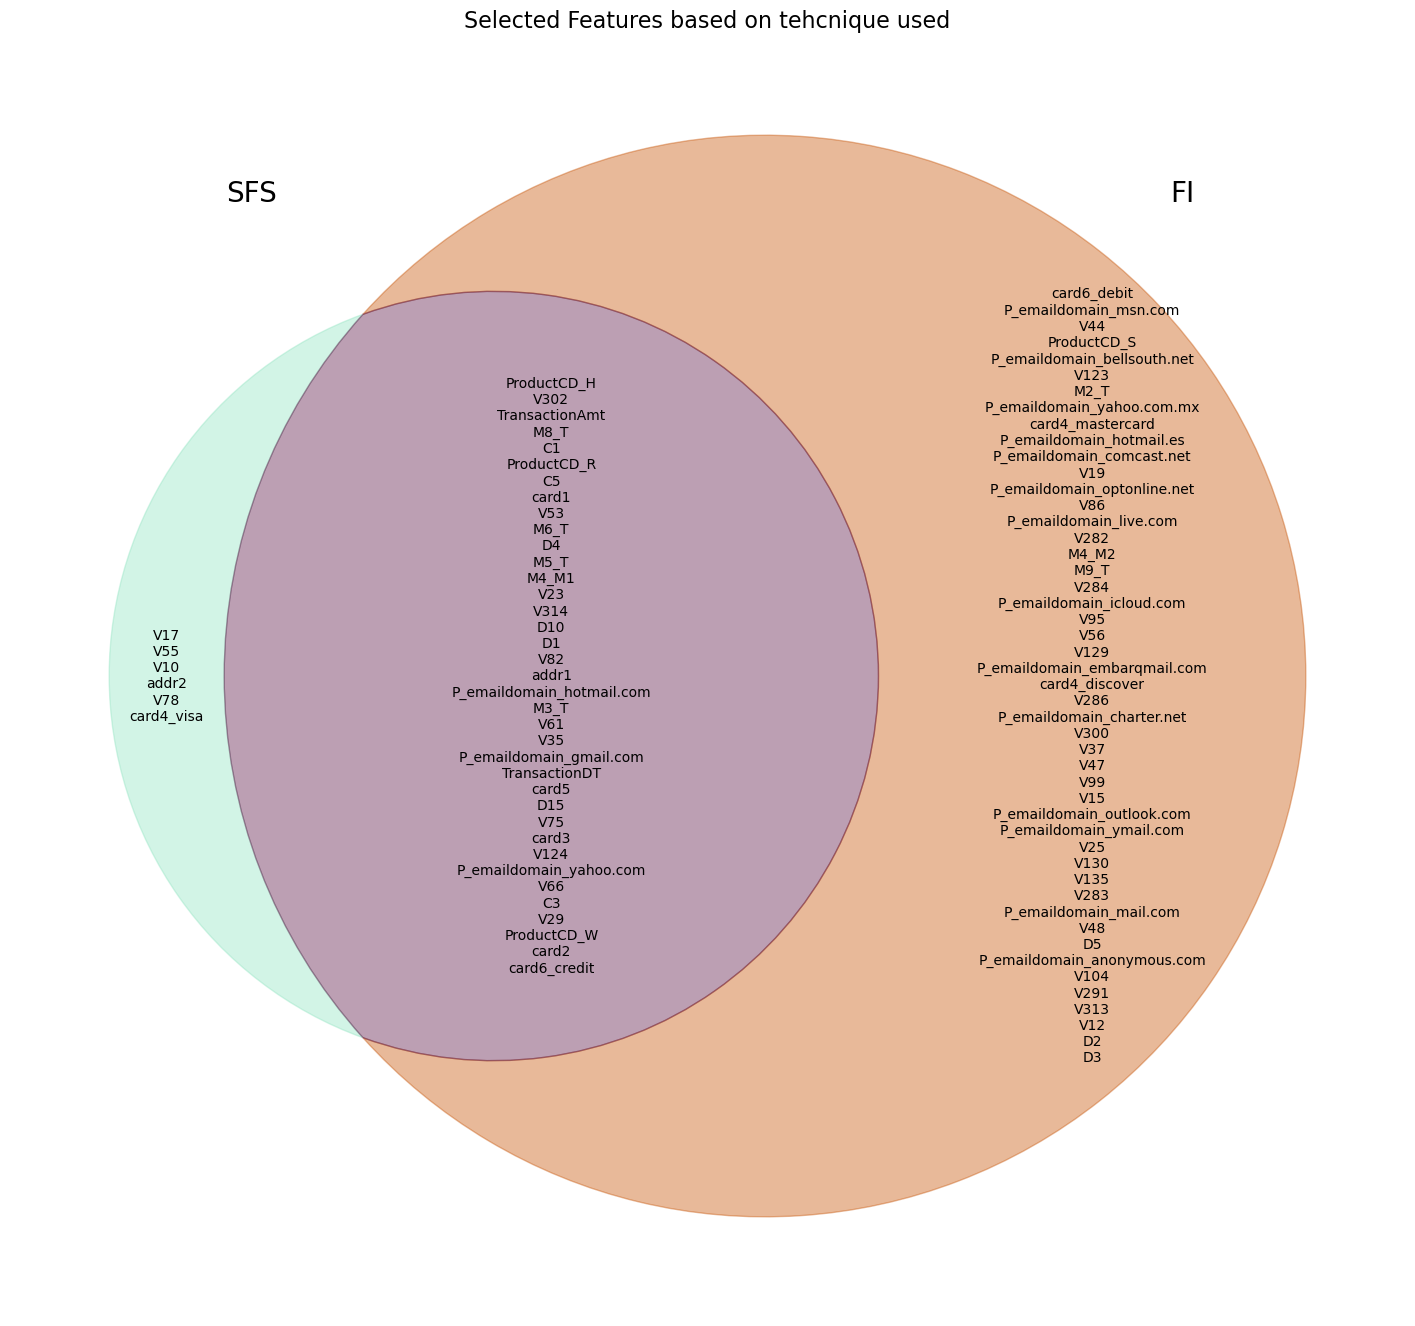

In [51]:
plt.figure(figsize=(18, 18))
venn = venn2([sfs_set, fi_set], set_labels = ('SFS', 'FI'))

for text in venn.set_labels:
    text.set_fontsize(20)

# Move the labels to the top
venn.get_label_by_id('A').set_position((-0.4, 0.5))
venn.get_label_by_id('B').set_position((0.5, 0.5))


# Customize the plot
venn.get_label_by_id('10').set_text('\n'.join(sfs_set - fi_set))
venn.get_label_by_id('01').set_text('\n'.join(fi_set - sfs_set))
venn.get_label_by_id('11').set_text('\n'.join(sfs_set & fi_set))

venn.get_label_by_id('10').set_fontsize(10)
venn.get_label_by_id('01').set_fontsize(10)
venn.get_label_by_id('11').set_fontsize(10)

venn.get_patch_by_id('10').set_color('xkcd:light teal')
venn.get_patch_by_id('01').set_color('xkcd:dark orange')
venn.get_patch_by_id('11').set_color('xkcd:plum')

plt.title('Selected Features based on tehcnique used', fontsize=16)
plt.show()

## PCA

In [52]:
from sklearn.decomposition import PCA

In [53]:
#Create a PCA object
pca = PCA()

# Fit PCA on your training data
pca.fit(X_droped)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

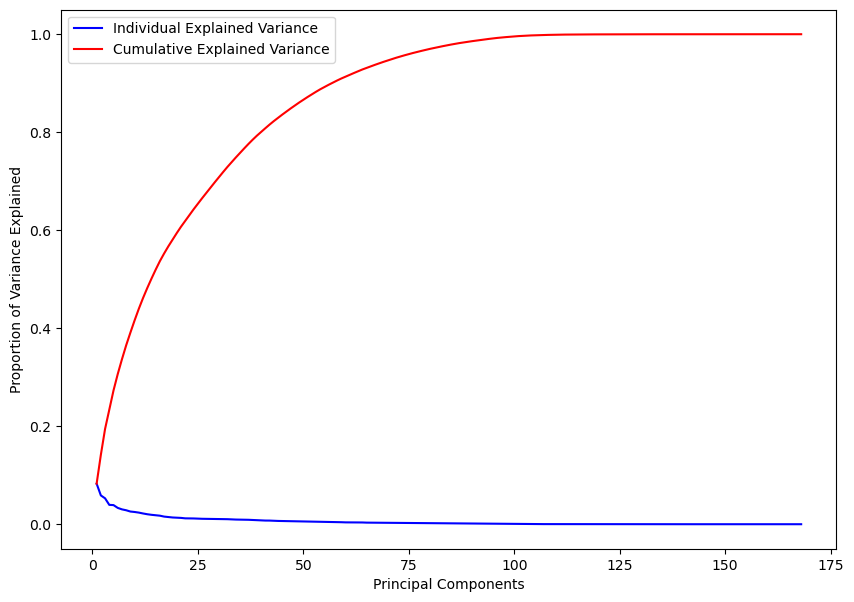

In [54]:
# Plot cumulative variance over principalcomponents
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'b-', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'r-', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.legend(loc='best')
plt.show()

In [55]:
# Define the number of components you want to keep
n_components = 0.98 

# Initialize the PCA model
pca = PCA(n_components=n_components)

# Fit and transform the data on the training set
X_pca = pca.fit_transform(X_droped)


print("Number of components chosen by PCA: ", pca.n_components_)

Number of components chosen by PCA:  86


In [56]:
# Initialize XGBoost classifier for PCA
xgb_model_pca = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='auc') 

# Evaluate the model
pca_results, pca_estimator, pca_skf = evaluate_model(xgb_model_pca, X_pca, y, cv=10)
print(pca_results)


      Metric  CV Mean  Train Mean
0   Accuracy    0.890       0.938
1  Precision    0.741       0.938
2     Recall    0.323       0.598
3    ROC AUC    0.826       0.957


In [57]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_droped.columns)

print(loadings)

                     PC1       PC2       PC3       PC4       PC5       PC6  \
TransactionDT  -0.023080  0.017519  0.051594  0.056723  0.039941  0.024736   
TransactionAmt -0.038611  0.067510  0.040597 -0.010419  0.008633  0.011234   
card1          -0.003685  0.009580  0.003142  0.010351 -0.006163 -0.014145   
card2           0.017061  0.005308 -0.013879  0.011037 -0.009156 -0.029518   
card3           0.225130 -0.092173 -0.102390 -0.021157 -0.006552 -0.074573   
...                  ...       ...       ...       ...       ...       ...   
M5_T           -0.016768  0.034901  0.020419 -0.004749 -0.006624  0.001596   
M6_T           -0.051531  0.001912  0.030103  0.023642  0.008246  0.033180   
M7_T           -0.009635  0.002858  0.006193  0.003255 -0.001914  0.007512   
M8_T           -0.026088  0.005000  0.014299  0.002968  0.000308  0.024277   
M9_T            0.008201 -0.011777 -0.009543  0.001731 -0.019787 -0.000813   

                     PC7       PC8       PC9      PC10  ...    

In [58]:

# Calculate squared loadings
squared_loadings = loadings ** 2

# Sum the squared loadings for each feature
overall_contribution = squared_loadings.sum(axis=1)

# Sort by overall contribution
overall_contribution_sorted = overall_contribution.sort_values(ascending=False)

# Create a DataFrame with feature names and their overall contribution
importance_df = pd.DataFrame({
    'Feature': overall_contribution_sorted.index,
    'Overall Contribution': overall_contribution_sorted.values
})

print(importance_df.head(21))

   Feature  Overall Contribution
0     V305              0.999985
1       V1              0.999953
2      V65              0.999920
3      V14              0.999893
4      V68              0.999866
5    card2              0.999855
6    addr1              0.999851
7       C5              0.999846
8      V41              0.999807
9     V135              0.999794
10     V88              0.999703
11   card1              0.999553
12      D3              0.999424
13      V4              0.999359
14     V10              0.999283
15     V47              0.998991
16      C3              0.998979
17   addr2              0.998957
18     V27              0.998883
19   card5              0.998880
20      D5              0.998708


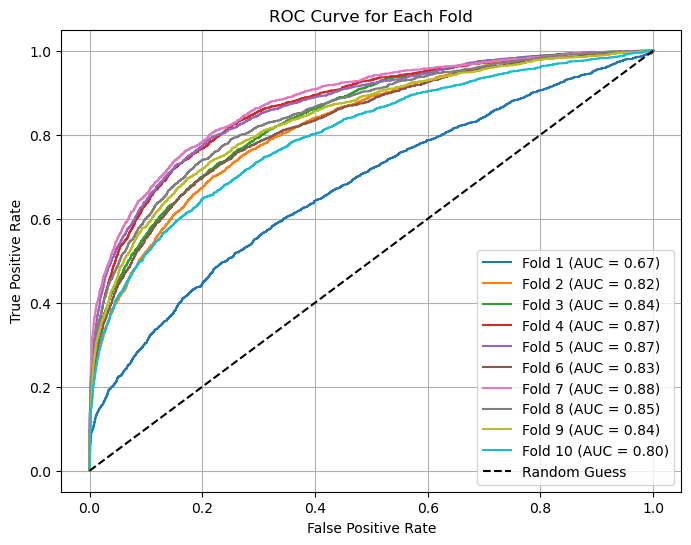

In [59]:
plot_roc_curves(pca_estimator, pca_skf, X_pca, y)

In [60]:
fi_results['Model'] = 'Feature Importance'
sfs_results['Model'] = 'Sequential Feature Selection'
pca_results['Model'] = 'PCA'

# Concatenate all DataFrames into one
all_results_df = pd.concat([fi_results, sfs_results, pca_results])

# Pivot the DataFrame
all_results_pivot = all_results_df.pivot(index='Model', columns='Metric', values='CV Mean')

print(all_results_pivot)


Metric                        Accuracy  Precision  ROC AUC  Recall
Model                                                             
Feature Importance               0.866      0.519    0.479   0.122
PCA                              0.890      0.741    0.826   0.323
Sequential Feature Selection     0.863      0.468    0.481   0.105


In [61]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier

In [62]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y,test_size=0.2, random_state=42)

In [63]:
# Check if the file exists
model_file = 'final_xgb_model.pkl'
if os.path.exists(model_file):
    # Load the model from file
    with open(model_file, 'rb') as f:
        final_xgb_model = pickle.load(f)
else:
    # Train the model
    param_search = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'n_estimators': (50, 200),
        'max_depth': (3, 10),
        'gamma': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (1, 10),
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.5, 1.0, 'uniform'),
        'reg_alpha': (1e-5, 100, 'log-uniform'),    
        'reg_lambda': (1e-5, 100, 'log-uniform')    
    }

    xgb_classifier = XGBClassifier(n_jobs=-1)
    bayes_search = BayesSearchCV(
        estimator=xgb_classifier,
        search_spaces=param_search,
        scoring='roc_auc',
        cv=5,
        n_iter=50,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    # Assuming you have X_train_selected, y_train_corr, X_test_selected, y_test_corr defined
    bayes_search.fit(X_train_pca, y_train_pca)
    best_params = bayes_search.best_params_

    final_xgb_model = XGBClassifier(**best_params)
    final_xgb_model.fit(X_train_pca, y_train_pca)

    # Save the trained model to file
    with open(model_file, 'wb') as f:
        pickle.dump(final_xgb_model, f)

In [64]:
plot_learning_curve(final_xgb_model, X_train_pca, y_train_pca, cv=10)

KeyboardInterrupt: 

In [ ]:
pca_hyper_results, pca_hyper_estimator, pca_hyper_skf = evaluate_model(final_xgb_model, X_pca, y, cv=10)
print(pca_hyper_results)

In [ ]:
plot_roc_curves(pca_hyper_estimator, pca_skf, X_pca, y)